<a href="https://colab.research.google.com/github/1Kote/reconhecimento_facial_IA/blob/dev_cavalcante/methods_detecting_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Métodos para detecção de faces 😀**

Quatro técnicas diferentes:


- Haar cascade (using OpenCV)
- HOG + SVM (Dlib)
- MMOD/CNN (Dlib)
- SSD (OpenCV's DNN module)



# Importação das bibliotecas

In [ ]:
import cv2 # OpenCV
import numpy as np
from google.colab.patches import cv2_imshow # Visualizar imagens

In [ ]:
cv2.__version__

# Detecção de faces com Haar cascade (OpenCV)

## Carregamento da imagem

In [ ]:
imagem = cv2.imread('/content/drive/MyDrive/images/person.jpg')

In [ ]:
imagem.shape # Informações da imagem.

In [ ]:
# Quantidade total de dados nessa imagem.
500 * 560 * 3

In [ ]:
# Mostrar imagem.
cv2_imshow(imagem)

## Conversão para a escala de cinza

In [ ]:
# Aplicando função para a conversão de escala.
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

In [ ]:
# Verificando informações da imagem cinza.
imagem_cinza.shape

In [ ]:
# Quantidade total de dados nessa nova imagem.
500 * 560

In [ ]:
cv2_imshow(imagem_cinza)

## Aplicar o detector facial

In [ ]:
detector_facial = cv2.CascadeClassifier('/content/drive/MyDrive/cascades/haarcascade_frontalface_default.xml')

In [ ]:
deteccoes = detector_facial.detectMultiScale(imagem_cinza)

# Vetores de posicionamento das faces em uma imagem.
# [ponto X, ponto Y, width, length]
print(deteccoes)

# Número de faces detectadas.
len(deteccoes)

## Desenhar o retângulo na face

In [ ]:
for (x, y, w, h) in deteccoes:
  print(x, y, w, h)
  # Parâmetros: imagem, ponto inicial, ponto final, cor da linha (BGR), largura da borda.
  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 255), 2)

cv2_imshow(imagem)

# Redimensionamento de imagem

## Apresentação do problema de detecção

In [ ]:
imagem = cv2.imread('/content/drive/MyDrive/images/people1.jpg')
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
print(imagem.shape)
print(imagem_cinza.shape)
cv2_imshow(imagem_cinza)

In [ ]:
deteccoes = detector_facial.detectMultiScale(imagem_cinza)
print(deteccoes)
len(deteccoes)

In [ ]:
for(x, y, w, h) in deteccoes:
  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 255), 3)

cv2_imshow(imagem)

Aqui foi possível verificar um problema de detecção devido a alta resolução da imagem. O algoritmo acabou entendendo que alguns conjuntos de pixels seriam parecidos com uma face.

## Redimensionar manualmente

In [ ]:
imagem = cv2.imread('/content/drive/MyDrive/images/people1.jpg')
imagem_redimensionada = cv2.resize(imagem, (600, 480))
print(imagem_redimensionada.shape)
cv2_imshow(imagem_redimensionada)

### Evitar distorções calculando proporções

In [ ]:
nova_largura = 600
proporcao = 1680/1120

nova_altura = int(nova_largura / proporcao)
print(nova_altura)

In [ ]:
imagem_redimensionada = cv2.resize(imagem, (600, 400))
print(imagem_redimensionada.shape)
cv2_imshow(imagem_redimensionada)

## Redimensionar utilizando escala

In [ ]:
imagem = cv2.imread('/content/drive/MyDrive/images/people1.jpg')

# Utilizando parâmetros de escala para controlar o tamanho da imagem.
imagem_escala = cv2.resize(imagem, None, fx=0.5, fy=0.5)

print(imagem_escala.shape)
cv2_imshow(imagem_escala)

## Nova detecção

In [ ]:
imagem_escala_cinza = cv2.cvtColor(imagem_escala, cv2.COLOR_BGR2GRAY)
deteccoes = detector_facial.detectMultiScale(imagem_escala_cinza)

for (x, y, w, h) in deteccoes:
  cv2.rectangle(imagem_escala, (x, y), (x + w, y + h), (0, 255, 255), 1)

cv2_imshow(imagem_escala)

# Parâmetros Haarcascade

**scaleFactor**
- Utilizar caso as faces sejam muito pequenas ou muito grandes;
- Especifica quanto o tamanho da imagem é reduzido a cada "escala" da imagem;
- Utilizado para criar pirâmide de escala.

- Deve ser maior que 1
- Quanto menor o tamanho das faces, menor o scaleFactor
- Vem com valor 1.1 por padrão

(500, 600)


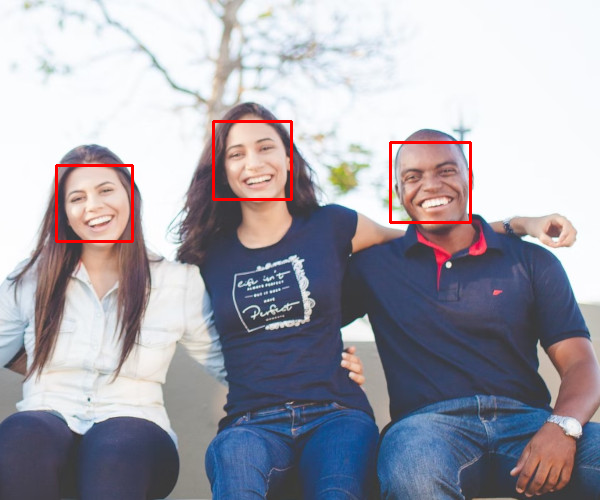

In [74]:
from re import S
imagem = cv2.imread('/content/drive/MyDrive/images/people2.jpg')
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
print(imagem_cinza.shape)

deteccoes = detector_facial.detectMultiScale(imagem_cinza, scaleFactor=1.2)
for(x, y, w, h) in deteccoes:
  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 0, 255), 2)

cv2_imshow(imagem)